# Самостоятельная работа 1
## Предсказание цены на подержанные автомобили Ford

## Выполнил: __Щеткин Дмитрий Сергеевич__

группа 2.1

Из Лр 3 нам известны ошибки моделей линейной регрессии и случайного леса:
- MAE: 4485.56, RMSE: 6656.34, R2: 0.62 for linear model
- MAE: 1828.15, RMSE: 3543.72,  R2: 0.89 for random forest model

Для более точных результатов я буду использовать модель XGBoost

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
%%capture
!wget https://github.com/nzhukov/14-09-2020-example/raw/refs/heads/master/training_data.xlsx
!wget https://github.com/nzhukov/14-09-2020-example/raw/refs/heads/master/test_data.xlsx

In [9]:
training_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
training_data = training_data.dropna()
training_data = training_data._get_numeric_data()

In [10]:
target_variable_name = 'price'
training_values = training_data[target_variable_name]
training_points = training_data.drop(target_variable_name, axis=1)

In [11]:
import xgboost as xgb

In [12]:
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(training_points, training_values)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)
test_data = test_data.dropna()
test_data = test_data._get_numeric_data()
test_values = test_data[target_variable_name]
test_points = test_data.drop(target_variable_name, axis=1)
list(test_points)==list(training_points)

True

In [15]:
test_predictions_xgb = model.predict(test_points)

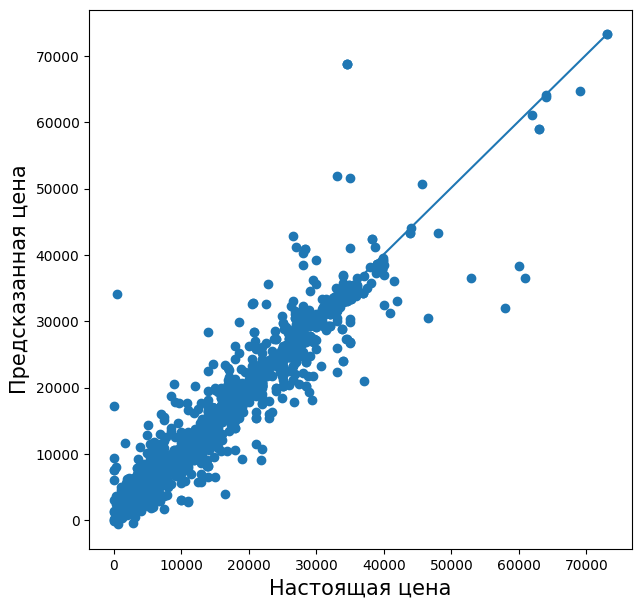

In [16]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_xgb)
plt.plot([0, max(test_values)], [0, max(test_predictions_xgb)])
plt.xlabel('Настоящая цена', fontsize=15)
plt.ylabel('Предсказанная цена', fontsize=15);

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for xgb model".format(
       mean_absolute_error(test_values, test_predictions_xgb),
       mean_squared_error(test_values, test_predictions_xgb)**0.5,
       r2_score(test_values, test_predictions_xgb)))

MAE: 1962.91, RMSE: 3642.16,  R2:    0.89 for xgb model


MAE: 1962.91, RMSE: 3642.16,  R2:    0.89 for xgb model

Таким образом, можно сказать, что XGBoost показывает лучшие результаты по точности (MAE, RMSE), чем линейная регрессия и случайный лес, несмотря на схожий R2 с случайным лесом.